<a href="https://colab.research.google.com/github/rochactivo-UPC/acc-Tools/blob/main/Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install eqsig
!pip install reqpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eqsig: filename=eqsig-1.2.10-py3-none-any.whl size=38394 sha256=3abd954fedc99998e28b8c52d047db34fbe010f73925f31638824bb7f084917b
  Stored in directory: /root/.cache/pip/wheels/58/eb/86/c7530e691896b14836a62ed305742db938e6715aabdba1b428
Successfully built eqsig
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import eqsig.single  # https://eqsig.readthedocs.io/en/latest/
import tkinter as tk
from tkinter import filedialog


filename = ['la03 Reg 2 dir 1.txt', 'la03 Reg 2 dir 2.txt']

acc_x = np.loadtxt(filename[0],
                   skiprows=1,
                   usecols=(0, 1),
                   dtype=float)
acc_y = np.loadtxt(filename[1],
                   skiprows=1,
                   usecols=(0, 1),
                   dtype=float)

design_spec = np.loadtxt('Espectro_diseño.txt',
                        skiprows=1,
                        usecols=(0, 1),
                        dtype=float)
g = 981

amax_x = max(abs(acc_x[:, 1]))
amax_y = max(abs(acc_y[:, 1]))
amax = max(amax_x, amax_y)
total_time_x = max(acc_x[:, 0])
total_time_y = max(acc_x[:, 0])


# TODO: calculating real maximum acceleration

a_xy = np.sqrt(acc_x[:, 1] ** 2 + acc_y[:, 1] ** 2)
a_xy_max = max(a_xy)



OSError: ignored

In [ ]:
# Calc Spectra
dt = 0.005  # time step of acceleration time series
periods = np.linspace(0, 5, 1000)  # compute the response for 1000 periods between T=0s and 5s

record_x = eqsig.AccSignal(acc_x[:, 1] / g, dt)  # unit convertion to g
record_x.generate_response_spectrum(response_times=periods)
times_x = record_x.response_times

record_y = eqsig.AccSignal(acc_y[:, 1] / g, dt)  # unit convertion to g
record_y.generate_response_spectrum(response_times=periods)
times_y = record_y.response_times


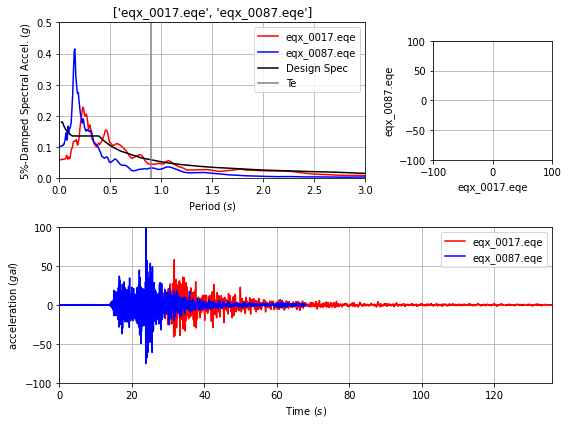

In [ ]:
# Figures

# fig, ((ax1, ax2), (ax3)) = plt.subplots(2, 1)

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=3)

# Response spectra
ax1.set(title=filename, xlabel='Period ($s$)', ylabel='5%-Damped Spectral Accel. ($g$)')
ax1.set(xlim=[0, 3], ylim=[0, 0.5])
ax1.grid()

ax1.plot(times_x, record_x.s_a, label=filename[0], color='red')
ax1.plot(times_y, record_y.s_a, label=filename[1], color='blue')
ax1.plot(design_spec[:,0], design_spec[:,1], label='Design Spec', color='black')
ax1.axvline(x = 0.9, color = 'grey', label = 'Te')

ax1.legend()
ax1.legend(loc='best')

# Particle movement
ax2.set(xlabel=filename[0], ylabel=filename[1])
ax2.set(xlim=[-amax, amax], ylim=[-amax, amax])
ax2.grid()

# ax2.plot(acc_x[:, 1], acc_y[:, 1], label="N00W-N90W", color='grey')
# ax2.arrow(0, 0, amax, amax_y, width=0.01, color='black')
# ax2.arrow(0, 0, -amax_x, -amax_y, width=0.01, color='black')
# ax2.legend() # esto no me sirve
# ax2.legend(loc='best') # Esto tampoco
ax2.set_aspect('equal', 'box')

# Time series
ax3.set(xlabel='Time ($s$)', ylabel='acceleration ($gal$)')
ax3.set(xlim=[0, max(total_time_x,total_time_y)], ylim=[-amax, amax])
ax3.grid()

ax3.plot(acc_x[:, 0], acc_x[:, 1], label=filename[0], color='red')
ax3.plot(acc_y[:, 0], acc_y[:, 1], label=filename[1], color='blue')

ax3.legend()
ax3.legend(loc='best')

plt.savefig(filename[0][0:5] + '.tif')
plt.tight_layout()
plt.show()